**Основная задача:** Приоритизировать гипотезы.

Этапы достижения основной задачи:
 - применить фреймворк ICE для приоритизации гипотез
 - применить фреймворк RICE для приоритизации гипотез
 - указать, как изменилась приоритизация гипотез при применении RICE вместо ICE

# Часть 1. Приоритизация гипотез

## Изучение данных

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

Структура **data_hypothesis**:
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
# оценим данные
pd.options.display.max_colwidth = 120
pd.read_csv('hypothesis.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
# оценив данные, создадим пайплайн для загрузки полного датасета:    
data_hypothesis = pd.read_csv('hypothesis.csv',
    names=['hypothesis','reach','impact','сonfidence','efforts'], header=0
) 
data_hypothesis.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   сonfidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


## Фреймворк ICE

Рассчет произведем по формуле:
    $$ICE = \frac{Impact * Confidence}{Efforts}$$

In [4]:
data_hypothesis['ICE'] = (data_hypothesis['impact'] * data_hypothesis['сonfidence'] / data_hypothesis['efforts']).round(2)
data_hypothesis.sort_values('ICE', ascending=False)[['hypothesis','ICE']]

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


## Фреймворк RICE

Рассчет произведем по формуле:
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [5]:
data_hypothesis['RICE'] = ((data_hypothesis['сonfidence'] * data_hypothesis['reach'] * data_hypothesis['impact']) / data_hypothesis['efforts']).round(2)
data_hypothesis.sort_values('RICE', ascending=False)[['hypothesis', 'RICE']]

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** В фреймворк RICE входит переменная, которая учитывает насколько сильно изменение повлияет на пользователей. Поэтому, приоритизация нововедений фреймворком RICE имееет первоочередные пункты, связанные напрямую с клиентами, в отличии от фреймворка ICE. Для клиентоориентированности первоочередными тремя гипотезами являются: 
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.

# Часть 2. Анализ A/B-теста

## Изучение данных


Структура **visits**:
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

Структура **visitors**:
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

In [6]:
# оценим данные orders
pd.read_csv('orders.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
# оценим данные visitors
pd.read_csv('visitors.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Оценив данные, создадим пайплайн для загрузки полного датасета:

In [8]:
orders = pd.read_csv('orders.csv',
    names=['transaction_id','visitor_id','date','revenue','group'], header=0,
    parse_dates=['date']
) 
visitors = pd.read_csv('visitors.csv',
    names=['date','group','visitors'], header=0,
    parse_dates=['date']  
) 

Выполним проверку и удаление дубликатов в каждом DF:

In [9]:
orders.duplicated().sum()

0

In [10]:

visitors.duplicated().sum()

0

Убедимся, что все данные удовлетворяют нашим условиям:

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Вывод:** Данные обоих DF переведенены в необходимые типы. Дубликатов нет. Пропусков нет. 

In [13]:
# посчитаем число уникальных значений в группе, для каждого пользователя
uniq_visitorId  = orders.groupby('visitor_id').agg({'group':'nunique'}).reset_index()
# пользователи попавшие в обе группы
no_uniq_visitorId = uniq_visitorId.query('group > 1')['visitor_id'].reset_index()['visitor_id']
# исключим пользователей из обеих групп
orders = orders.query('visitor_id not in @no_uniq_visitorId')

 ## 2.1. График кумулятивной выручки по группам

Cоздаем массив уникальных пар значений дат и групп теста:

In [14]:
datesGroups = orders[['date', 'group']].drop_duplicates()

Собирем агрегированные кумулятивные по дням данные о заказах:

In [15]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

Получаем агрегированные кумулятивные по дням данные о посетителях:

In [16]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Мержим и меняем название колонок в основной куммулятивной таблице данных:

In [17]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Определим величину среднего чека:

In [18]:
cumulativeData['mean_price'] = cumulativeData['revenue'] / cumulativeData['orders']

Сделаем выборку по группе:

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'mean_price']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'mean_price']
]

Построим граффик куммулятивной выручки по группам:

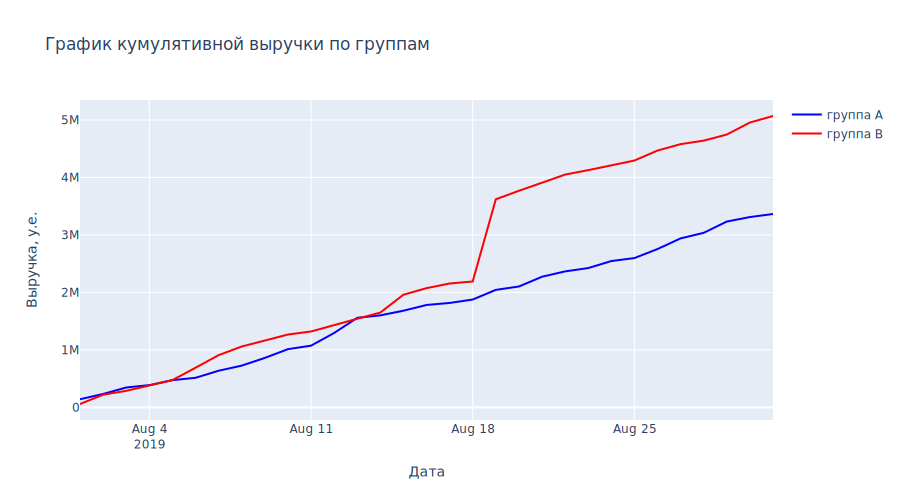

In [20]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=cumulativeRevenueA['date'], y=cumulativeRevenueA['revenue'], name='группа А',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=cumulativeRevenueB['date'], y=cumulativeRevenueB['revenue'], name='группа B',
                         line=dict(color='red', width=2)))
fig.update_layout(title='График кумулятивной выручки по группам',
                  xaxis_title='Дата',
                  yaxis_title='Выручка, у.е.',
                  width=900, height=500)
fig.show('svg')

**Вывод:** Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако график выручки группы В резко вырос 18 августа 2019г. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.

## 2.2. График кумулятивного среднего чека по группам

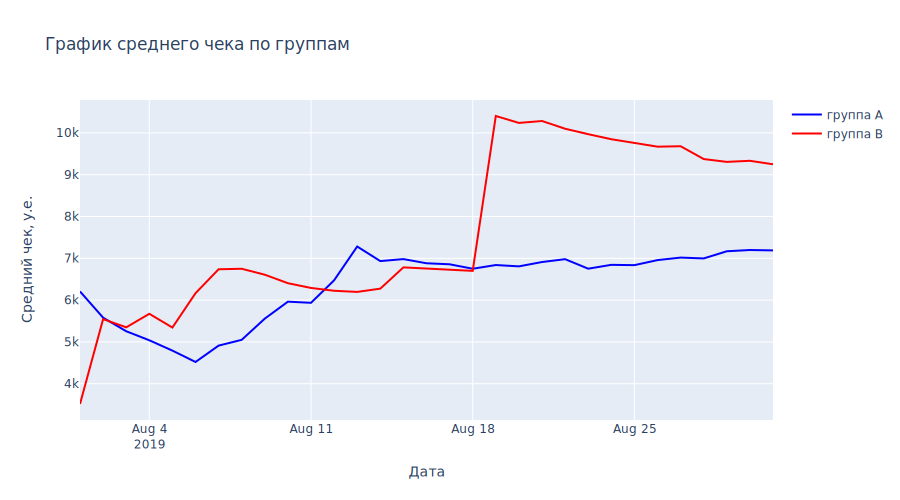

In [21]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=cumulativeRevenueA['date'], y=cumulativeRevenueA['mean_price'], name='группа А',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=cumulativeRevenueB['date'], y=cumulativeRevenueB['mean_price'], name='группа B',
                         line=dict(color='red', width=2)))
fig.update_layout(title='График среднего чека по группам',
                  xaxis_title='Дата',
                  yaxis_title='Средний чек, у.е.',
                  width=900, height=500)
fig.show('svg')

**Вывод:** 18 августа 2019 года произошел всплес в группе B. Скорее всего, в этот день были произведенены крупные заказы. На протяжении всего исследуемого периода однозначно нельзя сказать величину среднего значения, поскольку графики сильно колеблются. Необходимо произвести фильрацию на выбросы или необходио больше данных.

##  2.3. График относительного изменения кумулятивного среднего чека

Смержим данные в одном датафрейме по каждой группе:

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

Рассчитаем относительную величину среднего чека:

In [23]:
mergedCumulativeRevenue['cumul_revenue'] = (
    mergedCumulativeRevenue['mean_price_B'] / mergedCumulativeRevenue['mean_price_A']) - 1

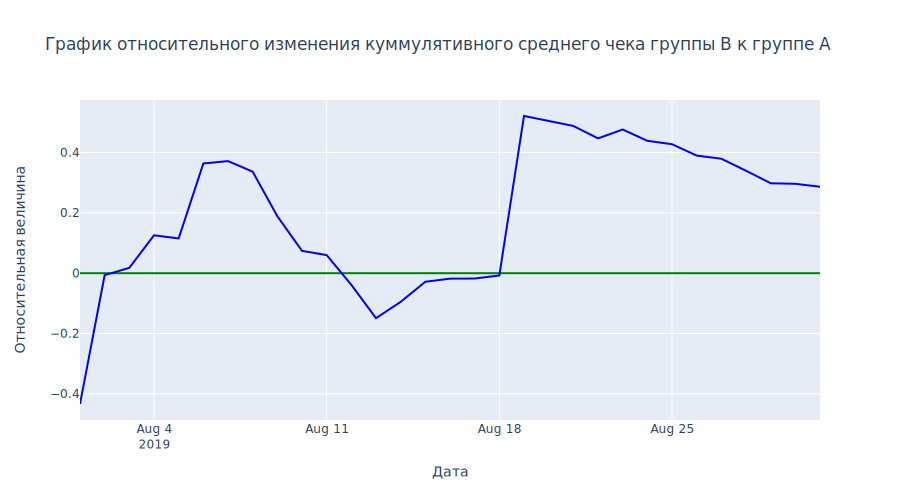

In [24]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=mergedCumulativeRevenue['date'], y=mergedCumulativeRevenue['cumul_revenue'],
                         line=dict(color='blue', width=2)))
fig.update_layout(title='График относительного изменения куммулятивного среднего чека группы В к группе А',
                  xaxis_title='Дата',
                  yaxis_title='Относительная величина',
                  width=900, height=500)
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#008000')
fig.show('svg')

**Вывод:** Результаты теста менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

## 2.4. График кумулятивной конверсии по группам:

Поссчитаем конверсию:

In [25]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
# сделаем срез по группе А
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# сделаем срез по группе В
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

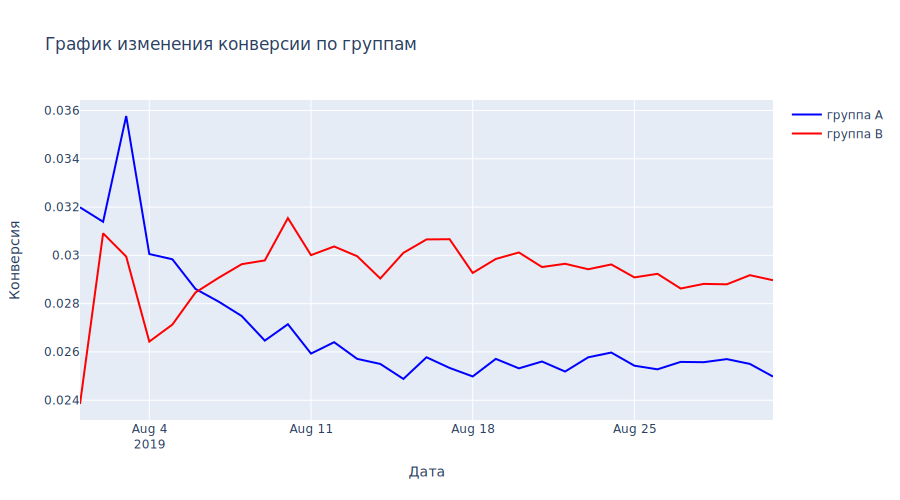

In [26]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=cumulativeDataA['date'], y=cumulativeDataA['conversion'], name='группа А',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=cumulativeDataB['date'], y=cumulativeDataB['conversion'], name='группа B',
                         line=dict(color='red', width=2)))
fig.update_layout(title='График изменения конверсии по группам',
                  xaxis_title='Дата',
                  yaxis_title='Конверсия',
                  width=900, height=500)
fig.show('svg')

**Вывод:** С опредленного момента графики имеют симметричный вид и начинают колебаться вокруг определнных значений. У группы В конверсия больше, чем у группы А. 

## 2.5. График относительного изменения кумулятивной конверсии

Смержим данные в одном датафрейме по каждой группе:

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_A', '_B'])

In [28]:
mergedCumulativeConversions['cumul_convers'] = (
    mergedCumulativeConversions['conversion_B'] / mergedCumulativeConversions['conversion_A']) - 1

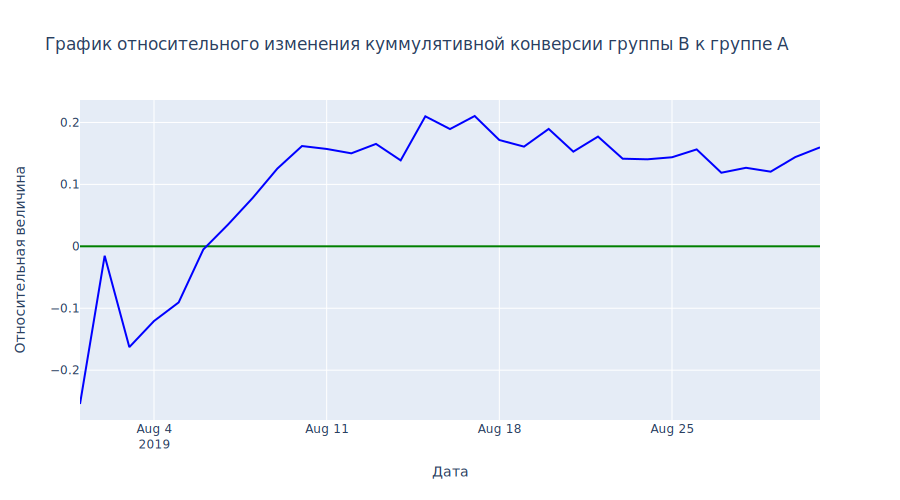

In [29]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=mergedCumulativeConversions['date'],
                         y=mergedCumulativeConversions['cumul_convers'],
                         line=dict(color='blue', width=2)))
fig.update_layout(title='График относительного изменения куммулятивной конверсии группы В к группе А',
                  xaxis_title='Дата',
                  yaxis_title='Относительная величина',
                  width=900, height=500)
fig.update_yaxes(zeroline=True, zerolinewidth=2, zerolinecolor='#008000')
fig.show('svg')

**Вывод:** Группа В изначально начала лидерство. Пытается зафиксироваться в районе 14% относительно группы А. 

## 2.6. Точечный график количества заказов по пользователям

Поссчитаем по каждому пользователю количество заказов:

In [30]:
orders_id = orders.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()

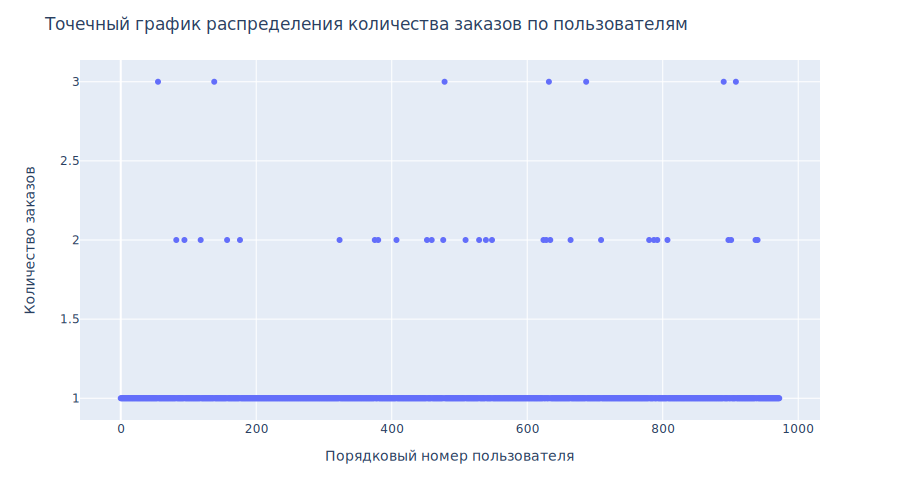

In [31]:
fig = px.scatter(orders_id, y='transaction_id')
fig.update_layout(title='Точечный график распределения количества заказов по пользователям',
                  xaxis_title='Порядковый номер пользователя',
                  yaxis_title='Количество заказов',
                  width=900, height=500)
fig.show('svg')

**Вывод:** Большинство пользователей, более 937, совершили по одному заказу. Как и предполагалось, есть пользователи с отличным от других пользователей количеством заказов. 

## 2.7. 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95 и 99 перцентиль методом percentile():

In [32]:
print(np.percentile(orders_id['transaction_id'], [95, 99])) 

[1. 2.]


**Вывод:** 5% пользователей совершили более 1 заказов. Возьмем 1 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## 2.8. Точечный график стоимостей заказов

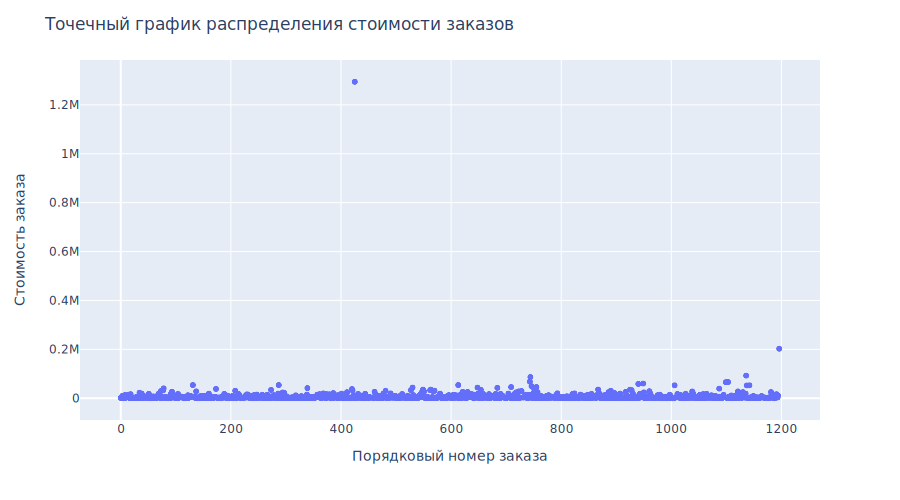

In [33]:
fig = px.scatter(orders, y='revenue')
fig.update_layout(title='Точечный график распределения стоимости заказов',
                  xaxis_title='Порядковый номер заказа',
                  yaxis_title='Стоимость заказа',
                  width=900, height=500)
fig.show('svg')

**Вывод:** 1 заказ явно отличается от остальных. По данному графику сразу нельзя сказать границу аномальных значений.

## 2.9. 95-й и 99-й перцентили стоимости заказов

In [34]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


**Вывод:** 5% заказов стоимостью выше 26785 у.е. Она и будет нижней границей аномальных значений стоимости заказов.

## 2.10. Cтатистическая значимость различий в конверсии между группами по «сырым» данным

Соберем все необходимые данные в одну таблицу:

In [35]:
# Количество покупателей в указанную дату в группе А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Количество покупателей в указанную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Количество заказов и их общая сумма в указанную дату в группе А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Количество заказов и их общая сумма в указанную дату в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Получаем агрегированные кумулятивные по дням данные о заказах группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

# Получаем агрегированные кумулятивные по дням данные о заказах группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

# Получаем агрегированные кумулятивные по дням данные о пользователях группы А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Получаем агрегированные кумулятивные по дням данные о пользователях группы В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Общая таблица всех данных
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Посчитаем количество заказов для каждого пользователя в каждой группе:

In [36]:
# для группы А
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

# для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Количество заказов для каждого пользователя в каждой группе:

In [37]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],
     axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
    axis=0)

Применим статистический критерий Манна-Уитни к полученным данным:

In [38]:
print("P-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("Отношение конверсии группы В к группе А = {0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))

P-value = 0.011
Отношение конверсии группы В к группе А = 15.980%


**Нулевая гипотеза:** конверсии между группами А и В равна

**Альтернативная гипотеза:** конверсии между группами А и В различается

**Вывод:** P-value меньше 0.05. Значит, отвергаем нулевую гипотезу и считаем, что в конверсии между группами есть различия. Также величина конверсии группы В выше, чем у группы А, на 16%.

## 2.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [39]:
print('P-value = {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'],
                       alternative='two-sided')[1]))

print('Отношение среднего чека группы В к группе А = {0:.3%}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value = 0.829
Отношение среднего чека группы В к группе А = 28.660%


**Нулевая гипотеза:** средний чек между группами А и В равен

**Альтернативная гипотеза:** средний чек между группами А и В различается

**Вывод:** P-value значительно больше 0.05. Значит считаем, что есть различия между средними чеками разных групп. Также средний чек группы В выше, чем у группы А, на 28.7%.

## 2.12. Cтатистическая значимость различий в конверсии между группами по «очищенным» данным.

Отфильтруем данные от анамальных значений, которые были выбраны выше:

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
) 

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [42]:
print("P-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))

print("Отношение конверсии группы В к группе А = {0:.3%}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

P-value = 0.016
Отношение конверсии группы В к группе А = 17.393%


**Нулевая гипотеза:** конверсии между группами А и В равна

**Альтернативная гипотеза:** конверсии между группами А и В различается

**Вывод:** P-value значительно меньше 0.05. Значит, отвергаем нулевую гипотезу и считаем, что в конверсии между группами есть различия. Также величина конверсии группы В выше, чем у группы А, на 17.4%.

## 2.13. Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [43]:
print('P-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
            orders[np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
            alternative='two-sided')[1]))

print("Отношение среднего чека группы В к группе А = {0:.3%}".format(
        orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()
        / orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value = 0.727
Отношение среднего чека группы В к группе А = -3.373%


**Нулевая гипотеза:** средние чеки между группами А и В равны

**Альтернативная гипотеза:** средние чеки между группами А и В различаются

**Вывод:** P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B стал ниже группы А на 3.4%.

# Заключение

Имеющиеся факты:
- Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами (Пункт 2.5) сообщает, что результаты группы B лучше группы A на 15%.
- График различия среднего чека говорит о том, что результаты группы B стабилизируется день ото дня и сейчас почти на 26% выше.

Исходя из обнаруженных фактов, тест следует продолжить, чтоб необределенные значения стали опредленными и доконца убедиться в более положительных(выгодных) показателях группы В по отношению к группе А.